<a href="https://colab.research.google.com/github/shap0011/machine_learning_fall_2024/blob/main/Real_Estate_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

In [19]:
# mount to /content/drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First thing, Import all the libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [21]:
# next load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,0,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,0,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,0,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,0,1


In [22]:
df.tail()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1858,760000,2008,881,249,5,5,7842,2003,436035,1,0,0,5,1,0
1859,690000,2015,1553,473,5,6,6501,1956,23086,1,0,0,59,1,0
1860,600000,1999,942,287,5,6,7064,1995,217800,1,0,0,4,1,0
1861,759900,2009,803,245,5,6,7500,2006,8886,1,0,0,3,1,0
1862,735000,2015,1459,444,5,6,7515,1958,10497,1,0,0,57,1,0


In [23]:
df.shape

(1863, 15)

## Linear Regression Model

In [24]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [25]:
# seperate input features in x
x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [26]:
# import module
from sklearn.model_selection import train_test_split

In [27]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
x_train.head()

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1689,2007,601,155,5,3,4082,1996,7405,1,0,0,11,1,0
1531,2005,438,124,4,4,4484,2005,27442,1,0,0,0,1,0
668,2006,312,88,3,2,2490,2004,2609,1,0,0,2,0,1
1740,2013,639,194,5,4,3046,1964,20037,1,0,1,49,1,0
117,2010,202,61,2,1,952,1964,0,1,0,1,46,0,1


In [29]:
y_train

,price
1689,642500
1531,579480
668,389000
1740,703000
117,214000
...,...
1228,367000
1077,429800
1318,513293
723,530000


In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1490, 14), (1490,), (373, 14), (373,))

In [32]:
# train your model
lrmodel = LinearRegression().fit(x_train, y_train)

In [33]:
lrmodel.coef_

array([ 7.92898177e+03, -4.22689266e+02,  2.24606761e+03,  3.64530650e+03,
        7.46225466e+03,  2.81854446e+01,  4.39746517e+03,  1.69254225e-01,
       -1.00734187e+04, -7.90752462e+03, -4.98164171e+04,  3.53151659e+03,
        1.42926973e+04, -1.42926973e+04])

In [34]:
lrmodel.intercept_

-24490246.700332455

In [ ]:
lrmodel.coef_

array([ 7.92898177e+03, -4.22689266e+02,  2.24606761e+03,  3.64530650e+03,
        7.46225466e+03,  2.81854446e+01,  4.39746517e+03,  1.69254225e-01,
       -1.00734187e+04, -7.90752462e+03, -4.98164171e+04,  3.53151659e+03,
        1.42926973e+04, -1.42926973e+04])

In [ ]:
lrmodel.intercept_

-24490246.700332455

In [35]:
x_train.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1689,2007,601,155,5,3,4082,1996,7405,1,0,0,11,1,0


In [40]:
# make predictions on train set
train_pred = lrmodel.predict(x_train)

In [41]:
train_pred

array([494649.98439427, 497331.62309308, 372766.50944761, ...,
       586086.24533397, 429704.94802878, 368989.63876721])

In [42]:
y_train

,price
1689,642500
1531,579480
668,389000
1740,703000
117,214000
...,...
1228,367000
1077,429800
1318,513293
723,530000


In [43]:
x_train.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1689,2007,601,155,5,3,4082,1996,7405,1,0,0,11,1,0


In [44]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error is', train_mae)

Train error is 87232.26681418679


In [45]:
lrmodel.coef_

array([ 7.92898177e+03, -4.22689266e+02,  2.24606761e+03,  3.64530650e+03,
        7.46225466e+03,  2.81854446e+01,  4.39746517e+03,  1.69254225e-01,
       -1.00734187e+04, -7.90752462e+03, -4.98164171e+04,  3.53151659e+03,
        1.42926973e+04, -1.42926973e+04])

In [46]:
lrmodel.intercept_

-24490246.700332455

In [47]:
# make predictions om test set
ypred = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error(ypred, y_test)
print('Test error is', test_mae)

Test error is 82294.70229463307


### Our model is still not good beacuse we need a model with Mean Absolute Error < $70,000

Note - We have not scaled the features and not tuned the model.

## Decision Tree Model

In [48]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [49]:
# create an instance of the class
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=567)

In [50]:
# train the model
dtmodel = dt.fit(x_train,y_train)

In [51]:
# make predictions using the test set
ytrain_pred = dtmodel.predict(x_train)

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

61653.68949055864

In [52]:
# make predictions using the test set
ytest_pred = dtmodel.predict(x_test)

In [53]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

58591.69255181888

## How do I know if my model is Overfitting or Generalised?

In [54]:
# make predictions on train set
ytrain_pred = dtmodel.predict(x_train)

In [55]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

61653.68949055864

## Plot the tree

In [56]:
# get the features
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Bunglow', 'property_type_Condo'],
      dtype=object)

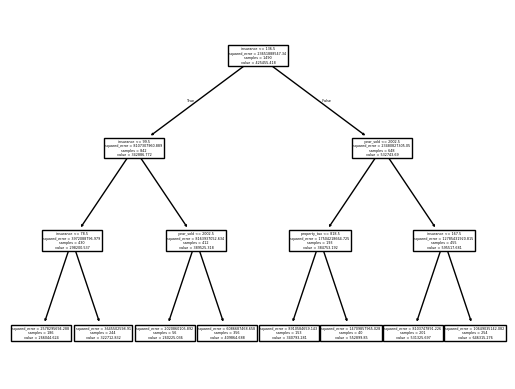

In [57]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=300)

# Save the plot to a file
plt.savefig('tree.png', dpi=300)

## Random Forest Model

In [58]:
# import decision tree model
from sklearn.ensemble import RandomForestRegressor

In [59]:
# create an instance of the model
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [60]:
# train the model
rfmodel = rf.fit(x_train,y_train)

In [62]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [63]:
# make predictions on the x_test values
ytest_pred = rfmodel.predict(x_test)

In [64]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

42704.8366689008

In [65]:
# Individual Decision Trees
# tree.plot_tree(rfmodel.estimators_[2], feature_names=dtmodel.feature_names_in_)

## Pickle:

* The pickle module implements a powerful algorithm for serializing and de-serializing a Python object structure.

* The saving of data is called Serialization, and loading the data is called De-serialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`.
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [69]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(dtmodel, open('RE_Model','wb'))

In [70]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [72]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[2012, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 0, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([266044.62365591])

In [73]:
x_test.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
266,2013,503,167,2,2,1200,1940,2744,1,1,1,73,1,0
